In [2]:
import sqlite3
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
engine = create_engine('sqlite:///adult.db', echo=False)

In [3]:
df=pd.read_csv('adult.data.txt')

In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.to_sql('adult', con=engine)

In [6]:
df=engine.execute("SELECT * FROM adult").fetchall()

In [7]:
df

[(0, 39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married', ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40, ' United-States', ' <=50K'),
 (1, 50, ' Self-emp-not-inc', 83311, ' Bachelors', 13, ' Married-civ-spouse', ' Exec-managerial', ' Husband', ' White', ' Male', 0, 0, 13, ' United-States', ' <=50K'),
 (2, 38, ' Private', 215646, ' HS-grad', 9, ' Divorced', ' Handlers-cleaners', ' Not-in-family', ' White', ' Male', 0, 0, 40, ' United-States', ' <=50K'),
 (3, 53, ' Private', 234721, ' 11th', 7, ' Married-civ-spouse', ' Handlers-cleaners', ' Husband', ' Black', ' Male', 0, 0, 40, ' United-States', ' <=50K'),
 (4, 28, ' Private', 338409, ' Bachelors', 13, ' Married-civ-spouse', ' Prof-specialty', ' Wife', ' Black', ' Female', 0, 0, 40, ' Cuba', ' <=50K'),
 (5, 37, ' Private', 284582, ' Masters', 14, ' Married-civ-spouse', ' Exec-managerial', ' Wife', ' White', ' Female', 0, 0, 40, ' United-States', ' <=50K'),
 (6, 49, ' Private', 160187, ' 9th', 5, ' Married-spo

In [8]:
df=pd.DataFrame(np.array(df))

In [9]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
df=df.drop([0], axis=1)

In [11]:
df= df.rename(index=str, columns={1:"age",2:"workclass",3:"fnlwgt",4:"education",5:"education-num",6:"marital-status",7:"occupation",8:"relationship",9:"race",10:"sex",11:"capital-gain",12:"capital-loss",13:"hours-per-week",14:"native-country",15:"class"})

In [12]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


Text(0.5,0,'sex')

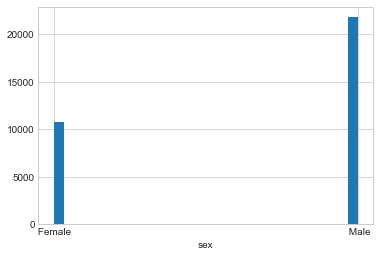

In [14]:

sns.set_style('whitegrid')
df['sex'].hist(bins=30)
plt.xlabel('sex')

Text(0.5,0,'relationship')

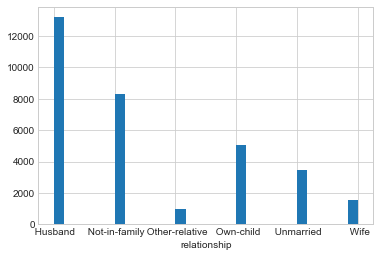

In [15]:


sns.set_style('whitegrid')
df['relationship'].hist(bins=30)
plt.xlabel('relationship')


In [16]:
df=df.filter(items=['sex', 'race', 'relationship' ])

In [17]:
df

,sex,race,relationship
0,Male,White,Not-in-family
1,Male,White,Husband
2,Male,White,Not-in-family
3,Male,Black,Husband
4,Female,Black,Wife
5,Female,White,Wife
6,Female,Black,Not-in-family
7,Male,White,Husband
8,Female,White,Not-in-family
9,Male,White,Husband
